# Analysis using the new DldFlashProcessor class
(simplifies the use of DASK)

In [1]:
# Imports needed for the user machine at FLASH (as we needed to install code locally as a user)
import sys, os
home_dir = os.path.expanduser("~")
sys.path.append(home_dir+".local/lib/python3.5/site-packages/")
sys.path.append("./lib")

In [2]:
import math
import numpy

import matplotlib as plt
import matplotlib.pyplot as pyplt
%matplotlib inline

from imp import reload
import DldFlashProcessor
reload(DldFlashProcessor)

<module 'DldFlashProcessor' from './lib/DldFlashProcessor.py'>

In [3]:
# create an instance
processor = DldFlashProcessor.DldFlashProcessor()

## Projection in 2D: pump-probe delay, flight time

In [41]:
# read the fdf5 file in Zurich
processor.readHdfFile("dldTestData_offlineTest_13738_all.h5")

Reading hdf5 file. Please wait...
Creating data frame: Please wait...


In [42]:
# We can do filtering if we like to...
processor.dd = processor.dd[processor.dd['microbunchId'] < 250]

In [43]:
# now let's bin in 2D:
processor.deleteBinners()

pumpProbeFrom     = -45.0 # ps
pumpProbeTo       =  20.0 # ps
pumpProbeStepSize =   1.5 # ps

dldTimeFrom       = 150 # ns
dldTimeTo         = 300 # ns
dldTimeStepSize   =   2 # ns


processor.addBinning('pumpProbeTime', pumpProbeFrom, pumpProbeTo, pumpProbeStepSize)
processor.addBinning('dldTime', dldTimeFrom, dldTimeTo, dldTimeStepSize)

In [44]:
# get the result:
result = processor.computeBinnedData()
result[numpy.isnan(result)] = 0

# we need to normalize the result with the delaystage histogram:
result = result / processor.delaystageHistogram[:,None]
result[numpy.isnan(result)] = 0

-c:6: RuntimeWarning: invalid value encountered in true_divide


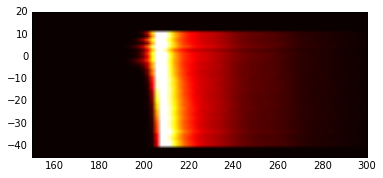

In [45]:
# Plot it
pyplt.imshow(result, origin='lower', cmap="hot", vmin=0, vmax=4, 
            extent=[dldTimeFrom, dldTimeTo, pumpProbeFrom, pumpProbeTo])

## 3D-Analysis: Pump-Probe delay, kinetic energy and radially integrated momentum

In [9]:
# read, and maybe filter
# Here, we can set a center for the radial integration
processor.readHdfFile("dldTestData_offlineTest_13738_all.h5")

# Filter:
#yFrom = 2000-200
#yTo   = 2000+200
#processor.dd = processor.dd[(processor.dd['posY'] < yTo) & (processor.dd['posY'] > yFrom)]

Reading hdf5 file. Please wait...
Creating data frame: Please wait...


In [10]:
# now let's bin in 3D:
processor.deleteBinners()

# pump-probe delay
pumpProbeFrom     = -45.0 # ps
pumpProbeTo       =  20.0 # ps
pumpProbeStepSize =   1 # ps

# dld time
dldTimeFrom       = 150 # ns
dldTimeTo         = 300 # ns
dldTimeStepSize   =   1.5 # ns

# radial integration
rFrom = 0
rTo = 1000
rStepSize = 10

# now set up the binnings:
processor.addBinning('pumpProbeTime', pumpProbeFrom, pumpProbeTo, pumpProbeStepSize)
processor.addBinning('dldTime', dldTimeFrom, dldTimeTo, dldTimeStepSize)
processor.addBinning('posRadius', rFrom, rTo, rStepSize)

In [11]:
# do the calculations
result = processor.computeBinnedData()

In [94]:
# remove nan-values
result[numpy.isnan(result)] = 0
# normaize by pump-probe delay histogram:
result = result[:,:,:] / processor.delaystageHistogram[:,None,None]
# remove nan
result[numpy.isnan(result)] = 0

-c:4: RuntimeWarning: divide by zero encountered in true_divide
-c:4: RuntimeWarning: invalid value encountered in true_divide


In [95]:
# take a single image from the stack:
bild = result[30,:,:]

# normalize by the radius
rad = numpy.arange(rFrom+0.5, rTo, rStepSize)[:-1]
bild = bild[:,:] / rad[:, None]

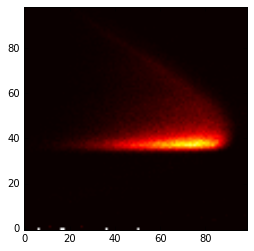

In [96]:
pyplt.imshow(bild, origin='lower', cmap="hot", vmax=bild.max()*0.7)
# extent=[rFrom, rTo, dldTimeFrom, dldTimeTo]

## Now we do it with a run:

In [9]:
reload(DldFlashProcessor)
# create an instance
processor = DldFlashProcessor.DldFlashProcessor()

In [12]:
processor.readRun(18380)

Creating data frame: Please wait...


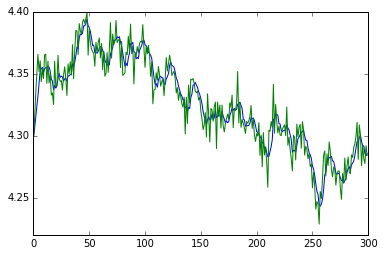

In [13]:
pyplt.plot(processor.bamFiltered[200, 0:300])
pyplt.plot(processor.bam[200, 0:300])

In [14]:
processor.createDataframe(withAux=True)
processor.addBinning('posX', 500, 1000, 10)
processor.addBinning('posY', 500, 1000, 10)
result = processor.computeBinnedData()

Creating data frame: Please wait...


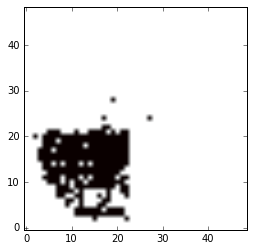

In [15]:
pyplt.imshow(result, origin='lower', cmap="hot", vmax=result.max()*0.7)

### Test Aux-Channel with latest run

In [17]:
processor.readRun(18380)


Creating data frame: Please wait...
Creating data frame: Please wait...


Creating data frame: Please wait...


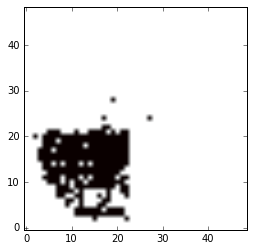

In [18]:
processor.createDataframe(withAux=True)
processor.addBinning('posX', 500, 1000, 10)
processor.addBinning('posY', 500, 1000, 10)
result = processor.computeBinnedData()
pyplt.imshow(result, origin='lower', cmap="hot", vmax=result.max()*0.7)

TypeError: Invalid dimensions for image data

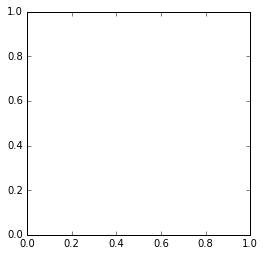

In [21]:
processor.addBinning('aux0',0,100,1)
result = processor.computeBinnedData()
pyplt.imshow(result,origin='lower', cmap="hot",)